[*********************100%%**********************]  3 of 3 completed
                  1202
Returns       0.254605
Volatility    0.254378
Sharpe Ratio  1.000890
KO Weight     0.000287
PG Weight     0.293013
MSFT Weight   0.706700
                   734
Returns       0.134165
Volatility    0.192625
Sharpe Ratio  0.696511
KO Weight     0.450282
PG Weight     0.457837
MSFT Weight   0.091881


/var/folders/yb/0fg_8nv17y5fjj0s_tq9clbh0000gn/T/ipykernel_80841/843673910.py:80: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


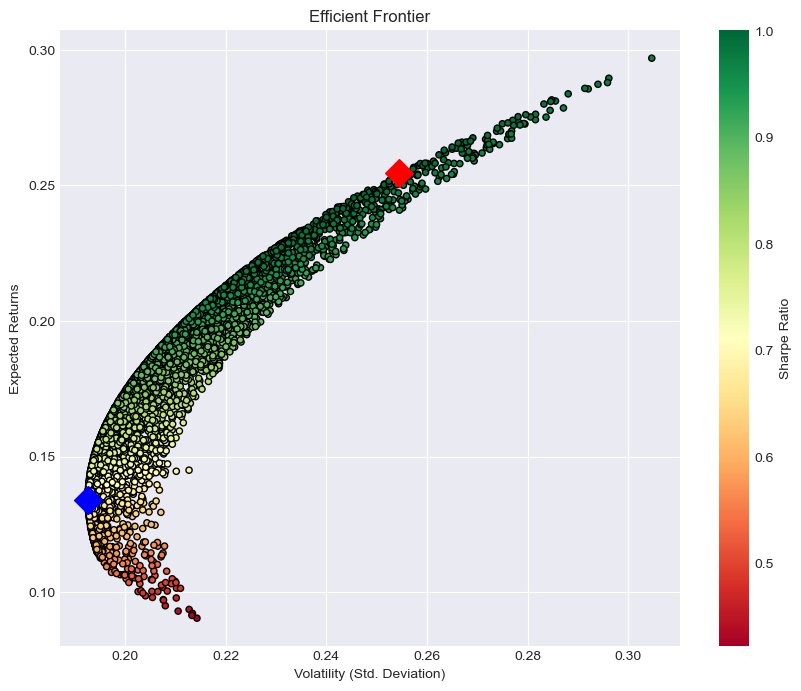

In [17]:
# import needed modules
import datetime
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
start = datetime.date(2019,1,1)
end = datetime.date.today()


# get prices data
selected = ['KO', 'PG', 'MSFT']
data = yf.download(selected, start=start, end=end)["Adj Close"]
data = data.reindex(columns=selected)

# calculate daily and annual returns of the stocks
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 5000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
   weights = np.random.random(num_assets)
   weights /= np.sum(weights)
   returns = np.dot(weights, returns_annual)
   volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
   sharpe = returns / volatility
   sharpe_ratio.append(sharpe)
   port_returns.append(returns)
   port_volatility.append(volatility)
   stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
            'Volatility': port_volatility,
            'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
   portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# find min Volatility & max sharpe values in the dataframe (df)
max_sharpe = df['Sharpe Ratio'].max()
min_volatility = df['Volatility'].min()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# print the details of the 2 special portfolios
print(sharpe_portfolio.T)
print(min_variance_port.T)

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
               cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()



In [9]:
data

,KO,PG,MSFT
Date,,,
2019-01-02,40.467049,80.935875,96.218147
2019-01-03,40.216991,80.368393,92.678497
2019-01-04,41.018902,82.008759,96.988899
2019-01-07,40.484295,81.680672,97.112587
2019-01-08,40.941307,81.982147,97.816719
...,...,...,...
2023-09-26,56.529999,149.320007,312.140015
2023-09-27,55.950001,147.339996,312.790009
2023-09-28,55.810001,146.339996,313.640015


In [11]:
df = pd.read_csv("./monthly_stock_prices.csv")
df

,Date,ANAホールディングス,HOYA,JXTGホールディングス,KDDI,MS＆ADインシュアランスグループホールディングス,SMC,SOMPOホールディングス,SUBARU,みずほフィナンシャルグループ,...,武田薬品工業,積水ハウス,第一三共,第一生命ホールディングス,花王,西日本旅客鉄道,資生堂,野村ホールディングス,銘柄名,Ｚホールディングス
0,2013-10-31,51.934722,3126.666667,487.583333,NaN,1355.000000,22778.611111,1098.402778,8539.722222,1623.027778,...,4647.222222,1313.777778,590.740741,1044.638889,3083.805556,2568.722222,1726.000000,2475.722222,16254.444444,506.388889
1,2013-11-30,51.781250,3205.750000,517.575000,NaN,1484.850000,23238.250000,1278.937500,8773.000000,1745.025000,...,4788.250000,1374.475000,624.091669,1103.874994,3320.875000,2499.400000,1721.400000,2671.425000,16329.250000,478.975000
2,2013-12-31,53.545000,3314.000000,525.675000,NaN,1635.450000,24987.000000,1441.362500,8936.750000,1800.050000,...,5034.000000,1423.575000,624.408331,1128.500003,3296.375000,2437.050000,1681.175000,2835.950000,17654.000000,551.475000
3,2014-01-31,56.416316,3194.105263,528.184211,NaN,1700.210526,27258.552632,1375.315789,9248.157895,1723.078947,...,4816.157895,1497.184211,622.921048,1092.201745,3308.184211,2391.631579,1634.421053,2880.631579,17629.210526,615.210526
4,2014-02-28,55.782894,3053.552632,505.473684,NaN,1520.500000,25048.289474,1228.144737,8684.210526,1528.473684,...,4775.000000,1344.973684,563.570176,1015.499998,3304.447368,2273.236842,1691.526316,2634.578947,16929.342105,607.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2023-06-30,165.091363,3692.863636,483.577271,1520.920455,2618.681818,80115.000000,2472.500000,23243.181818,2511.250000,...,4532.295455,2789.045455,4760.454545,3273.840909,5164.181818,3532.000000,6653.159091,6306.704545,5071.000000,354.400002
117,2023-07-31,164.922500,3743.225000,500.627500,1542.887500,2771.737500,76493.500000,2391.075000,23740.875000,2611.137500,...,4395.800000,2896.175000,4067.825000,3230.000000,5302.475000,3534.225000,6303.025000,6440.800000,4782.350000,382.859999
118,2023-08-31,163.245456,3595.795455,525.825000,1615.363636,2689.909091,69580.681818,2544.454545,21467.727273,2624.647727,...,4423.227273,2891.272727,4266.295455,3129.625000,5602.204545,3619.636364,6116.227273,6147.545455,4118.954545,412.686365
119,2023-09-30,175.507499,3625.950000,597.472498,1728.875000,3012.650000,69378.000000,2653.512500,20799.125000,2864.050000,...,4670.750000,3054.837500,4123.475000,3483.875000,5582.150000,3800.550000,5631.700000,6650.050000,4044.475000,431.795002
